In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\sai kumar\Downloads\LinearRegression\LinearRegression\Admission_Prediction.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            485 non-null float64
TOEFL Score          490 non-null float64
University Rating    485 non-null float64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
data=data.drop(columns=["Serial No."])

In [7]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [10]:
data.isna().sum()

GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [11]:
data["GRE Score"]=data["GRE Score"].fillna(data["GRE Score"].mean())

In [12]:
data["TOEFL Score"]=data["TOEFL Score"].fillna(data["TOEFL Score"].mean())

In [13]:
data["University Rating"]=data["University Rating"].fillna(data["University Rating"].mode()[0])

In [14]:
data.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

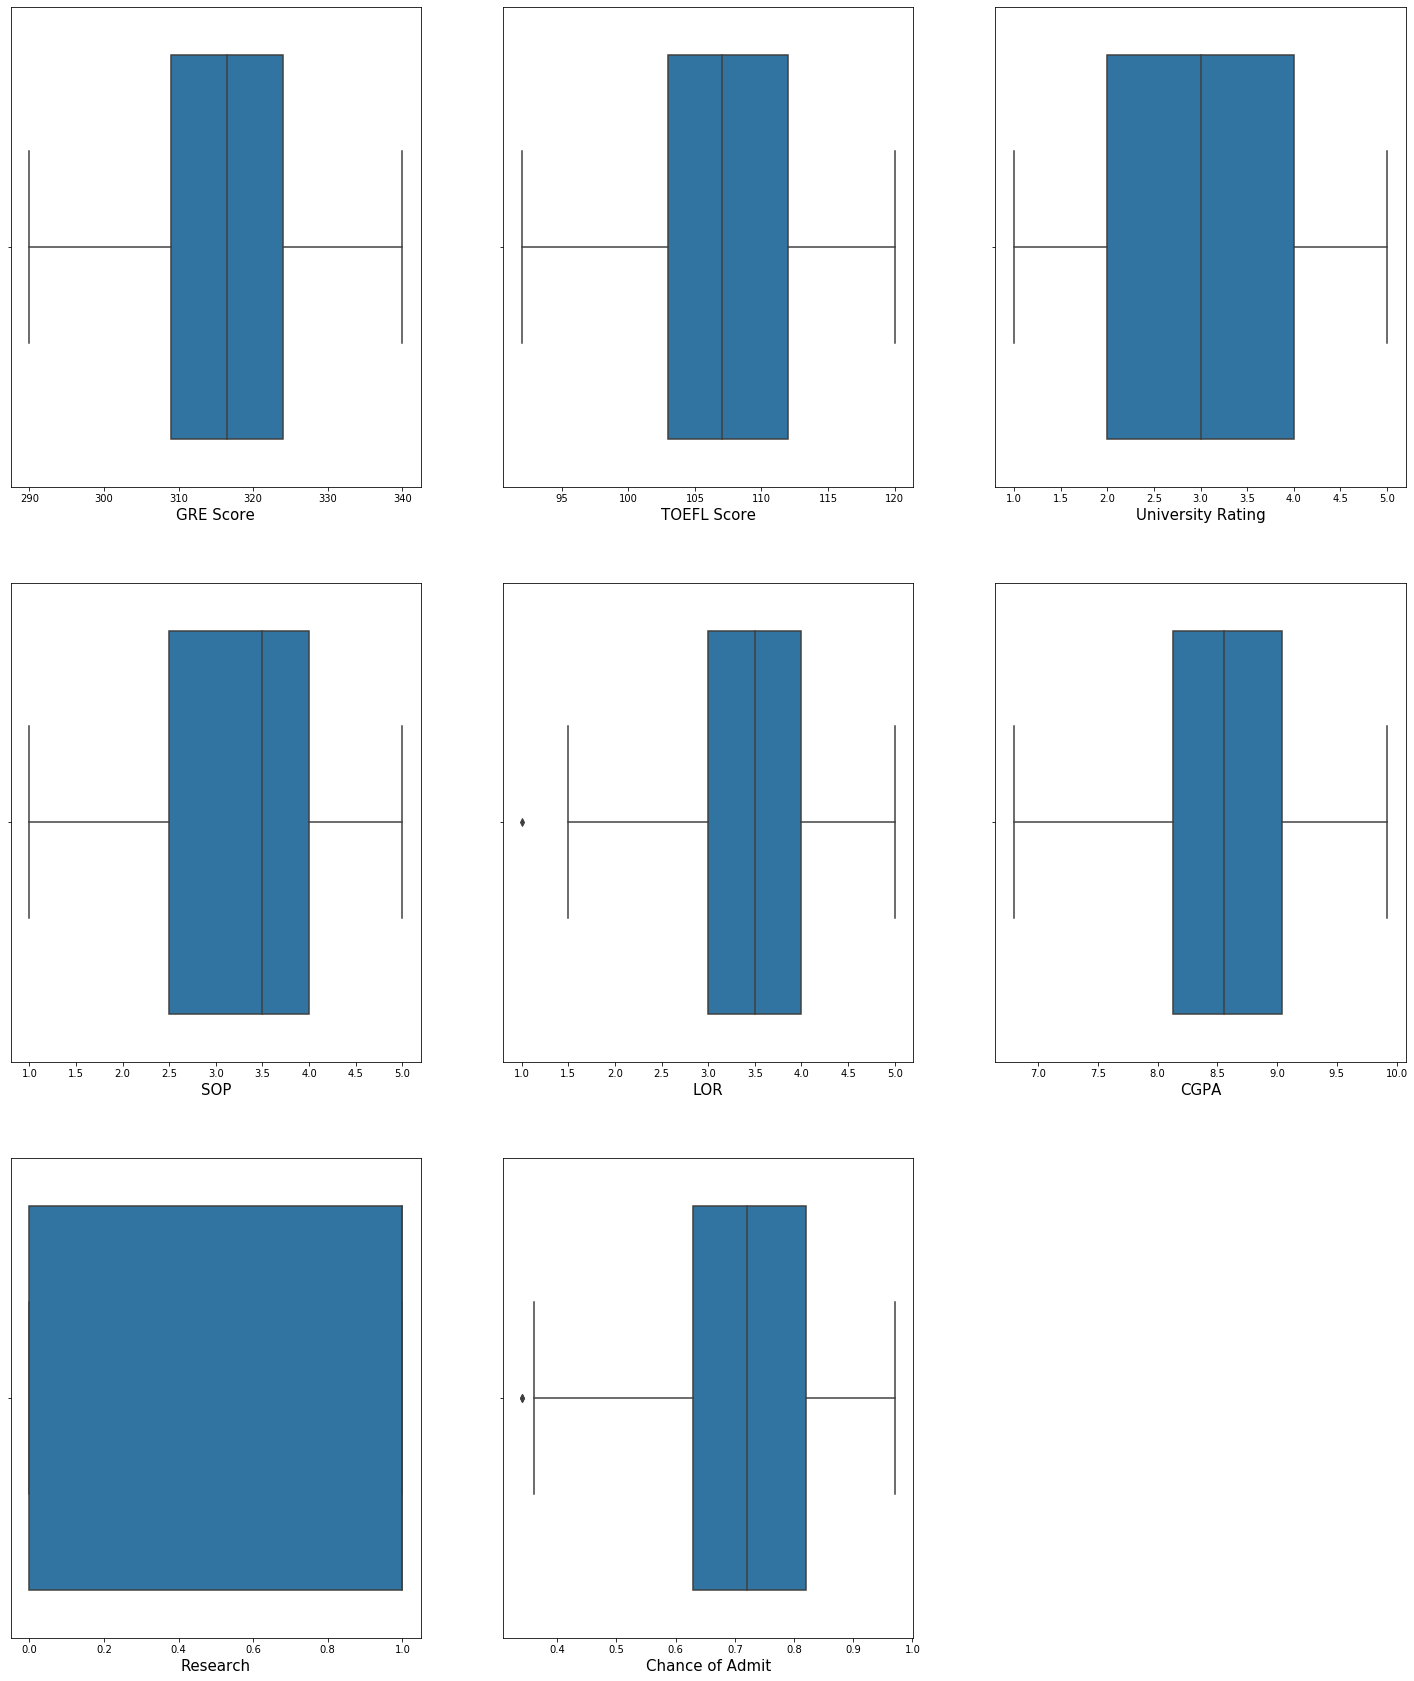

In [15]:
plt.figure(figsize=(25,30))
plotnum=1


for column in data:
    if plotnum<=9:
        ax=plt.subplot(3,3,plotnum)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnum+=1

In [16]:
data.LOR.min()

1.0

In [18]:
data["LOR"]=np.where(data["LOR"]<1.5,1.5,data["LOR"])

In [19]:
data["Chance of Admit"]=np.where(data["Chance of Admit"]<0.4,0.4,data["Chance of Admit"])

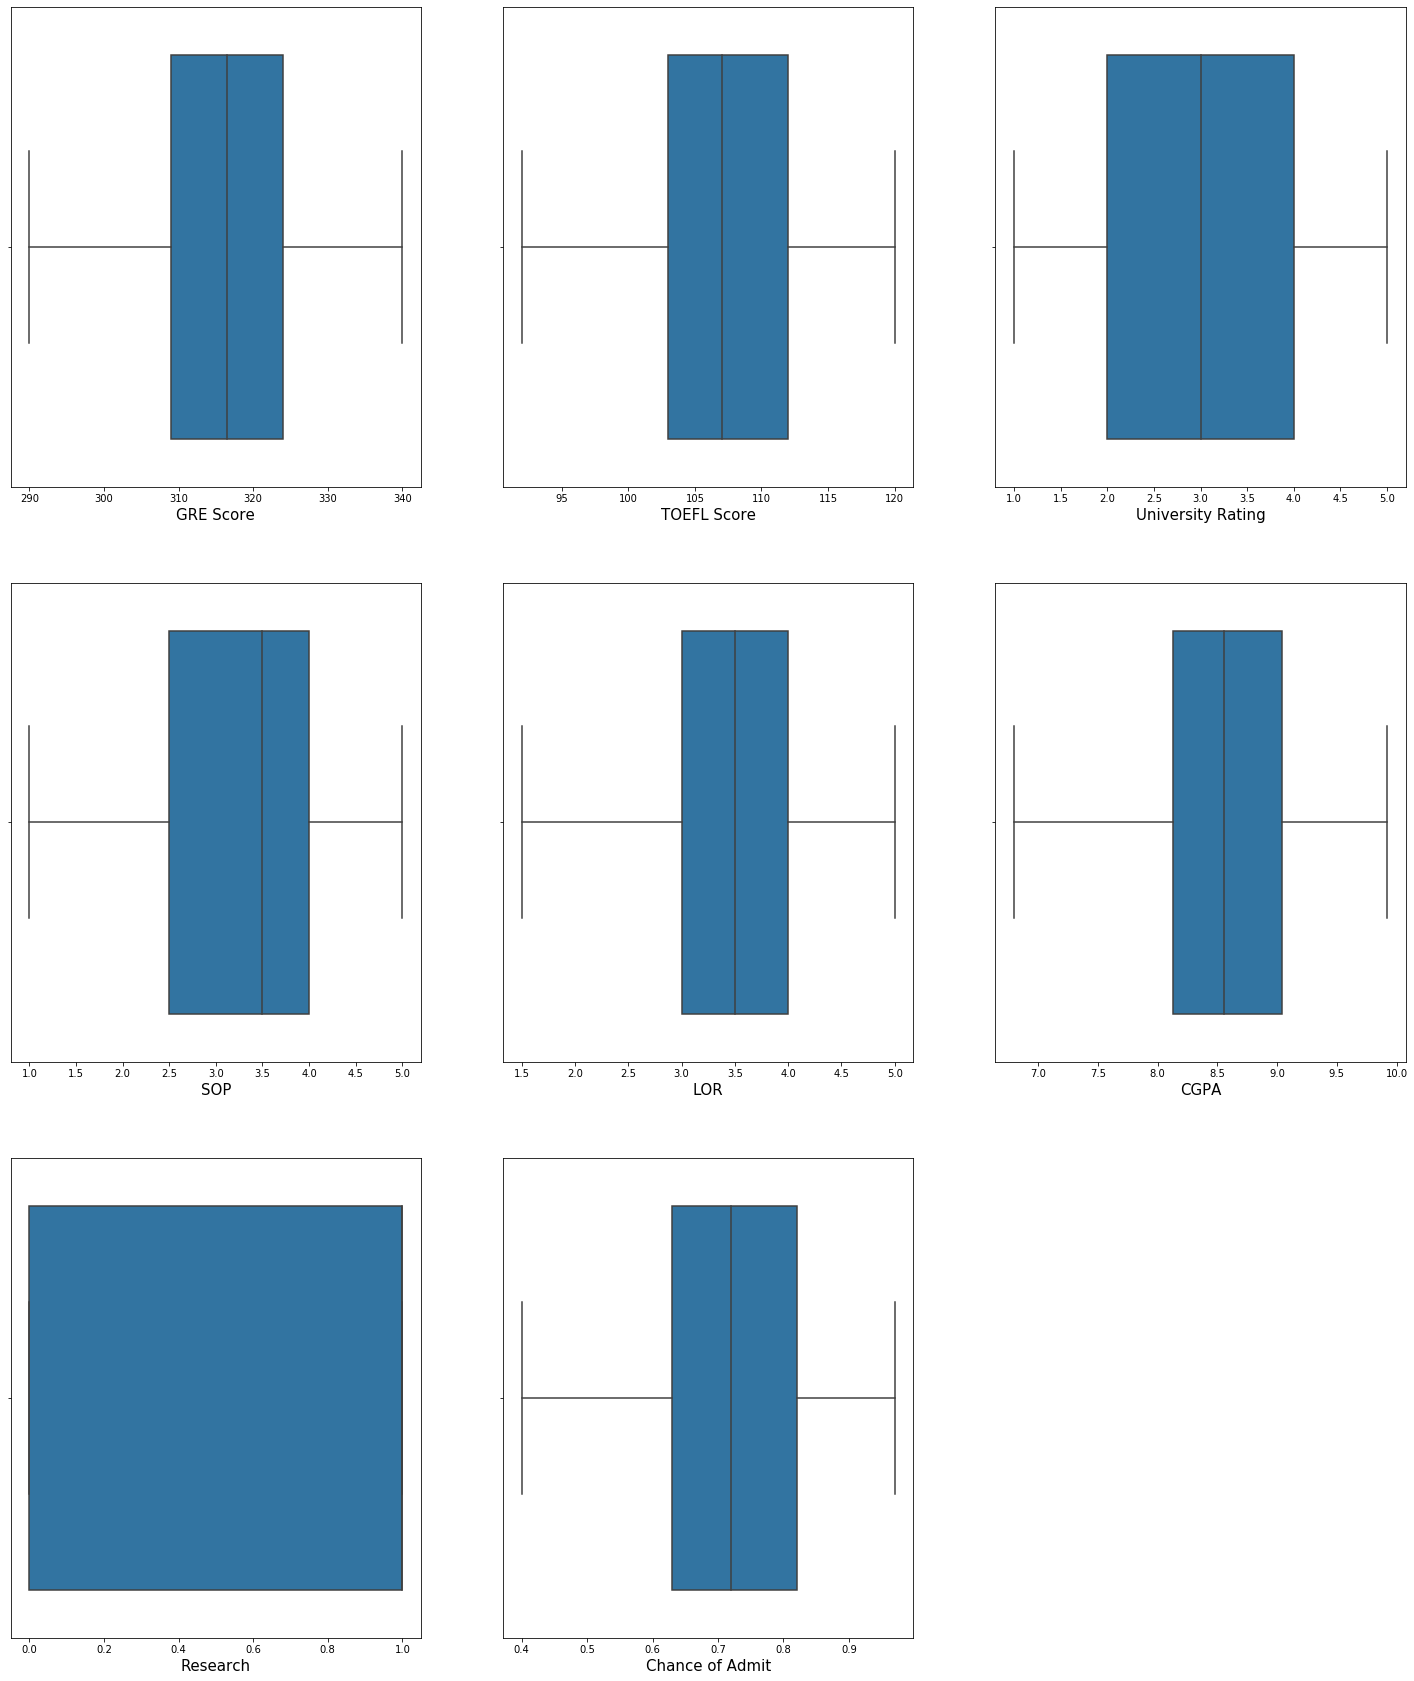

In [20]:
plt.figure(figsize=(25,30))
plotnum=1


for column in data:
    if plotnum<=9:
        ax=plt.subplot(3,3,plotnum)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnum+=1

In [21]:
y=data["Chance of Admit"]

In [22]:
x=data.drop(columns=["Chance of Admit"])

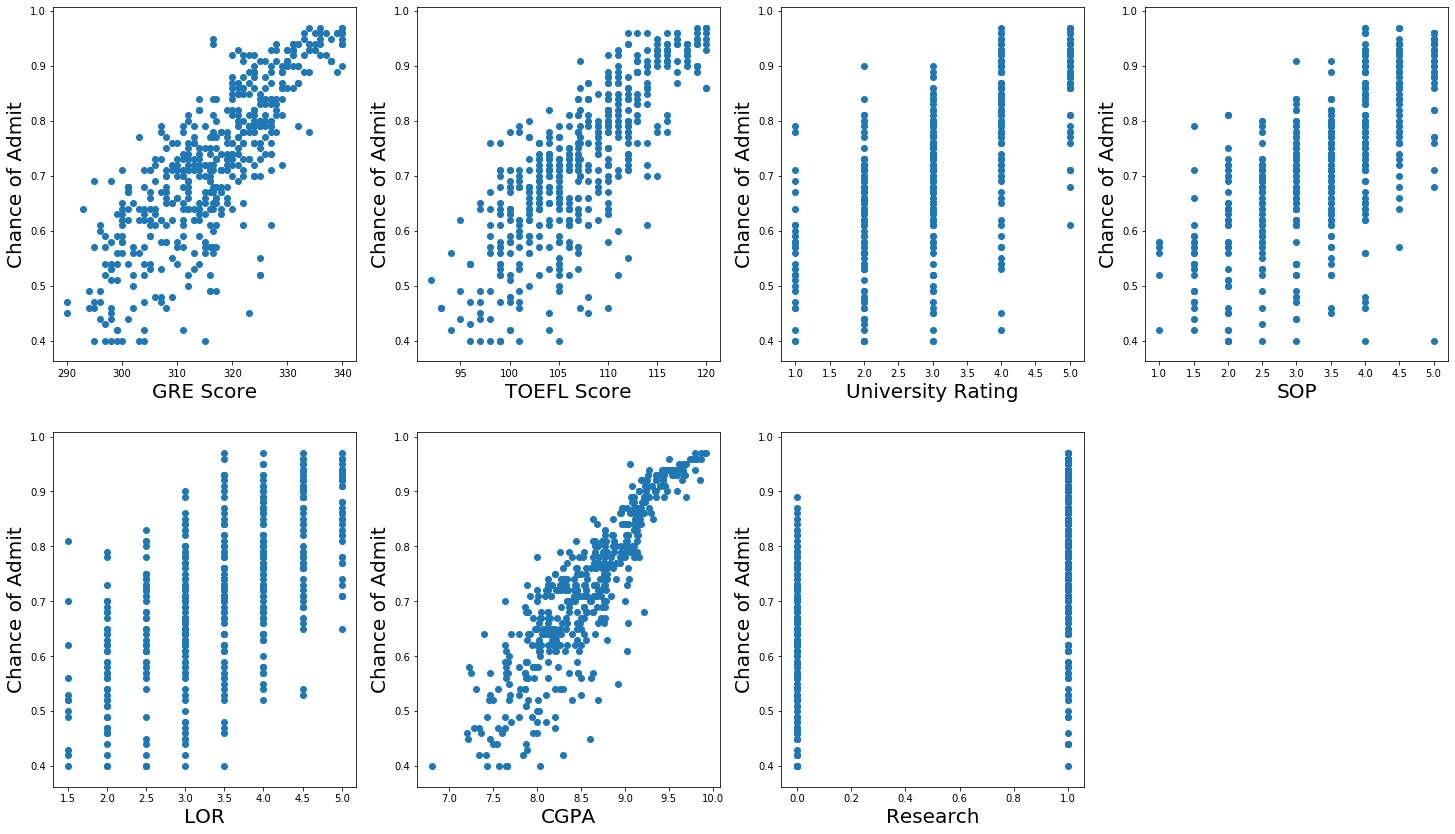

In [23]:
plt.figure(figsize=(25,30))
plotnum=1

for column in x:
    if plotnum<=16:
        
        ax=plt.subplot(4,4,plotnum)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel("Chance of Admit",fontsize=20)
    plotnum+=1


In [24]:
scaler=StandardScaler()

In [25]:
x_scaled=scaler.fit_transform(x)

In [26]:
x_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.10074403e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.10074403e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.62671531e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.64298246e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.64298246e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.10074403e+00,  7.67219636e-01, -1.12815215e+00]])

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=35)

In [53]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
regression.score(x_train,y_train)

0.8258938213830718

In [55]:
regression.score(x_test,y_test)

0.8177314537779311

In [56]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [57]:
adj_r2(x_train,y_train)

0.8223302446277545

In [58]:
adj_r2(x_test,y_test)

0.80874638459797

In [59]:
regression.predict(scaler.transform([[350,120,4,4.5,4.5,8.8,1]]))

array([0.88329588])

In [60]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV

In [61]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [62]:
alpha = lasscv.alpha_
alpha

6.559367828551126e-06

In [63]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=6.559367828551126e-06, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [64]:
lasso_reg.score(x_test, y_test)

0.8177374175325455

In [65]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([3.9031609 , 8.43938856, 4.33763701, 3.2695451 , 0.24673757,
       4.06015215, 2.50092495, 3.44870286, 6.65414137, 6.81911878,
       7.47310058, 1.31088232, 4.75054066, 4.76028161, 7.9587648 ,
       7.04491563, 2.60632583, 0.48780193, 5.5946758 , 6.58976185,
       5.12628527, 6.62944378, 9.06578002, 9.4910938 , 2.55476599,
       8.78482538, 6.57335401, 4.37605628, 8.7238892 , 1.98108214,
       0.31681879, 5.5006387 , 4.49044513, 7.80187148, 6.13788152,
       1.26508615, 7.30278027, 7.40513553, 2.96772714, 0.50496044,
       0.02713372, 5.06983319, 3.23115132, 0.73497651, 2.3383606 ,
       6.78560441, 6.88782777, 1.65047196, 1.14758773, 4.54229398]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [66]:
ridgecv.alpha_

0.02713372481535803

In [67]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.02713372481535803, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [68]:
ridge_model.score(x_test, y_test)

0.8177274622266814